In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
inception_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [7]:
for layer in inception_v3.layers[: -15]:
    layer.trainable = False

In [8]:
inception_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [9]:
x = inception_v3.output
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(units=4, activation='softmax')(x)
model = Model(inception_v3.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [16]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/kaggle/input/chest-ctscan-images/Data/train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 613 images belonging to 4 classes.


In [14]:
test_set = train_datagen.flow_from_directory('/kaggle/input/chest-ctscan-images/Data/test',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 315 images belonging to 4 classes.


In [17]:
histry = model.fit_generator(training_set,
                            validation_data=test_set,
                            epochs=10,
                            steps_per_epoch=len(training_set),
                            validation_steps=len(test_set)
                            )

/tmp/ipykernel_28/3822411847.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  histry = model.fit_generator(training_set,


Epoch 1/10
20/20 [==============================] - 31s 739ms/step - loss: 11.2622 - accuracy: 0.4274 - val_loss: 2.7722 - val_accuracy: 0.5651
Epoch 2/10
20/20 [==============================] - 6s 323ms/step - loss: 1.8048 - accuracy: 0.6525 - val_loss: 1.2192 - val_accuracy: 0.6127
Epoch 3/10
20/20 [==============================] - 6s 306ms/step - loss: 0.6825 - accuracy: 0.7406 - val_loss: 0.7923 - val_accuracy: 0.6444
Epoch 4/10
20/20 [==============================] - 6s 295ms/step - loss: 0.4851 - accuracy: 0.8124 - val_loss: 0.7563 - val_accuracy: 0.7111
Epoch 5/10
20/20 [==============================] - 6s 293ms/step - loss: 0.4758 - accuracy: 0.8515 - val_loss: 1.0980 - val_accuracy: 0.6730
Epoch 6/10
20/20 [==============================] - 6s 321ms/step - loss: 0.3977 - accuracy: 0.8711 - val_loss: 0.9140 - val_accuracy: 0.6698
Epoch 7/10
20/20 [==============================] - 6s 284ms/step - loss: 0.3204 - accuracy: 0.8825 - val_loss: 0.7313 - val_accuracy: 0.7333
Epoc

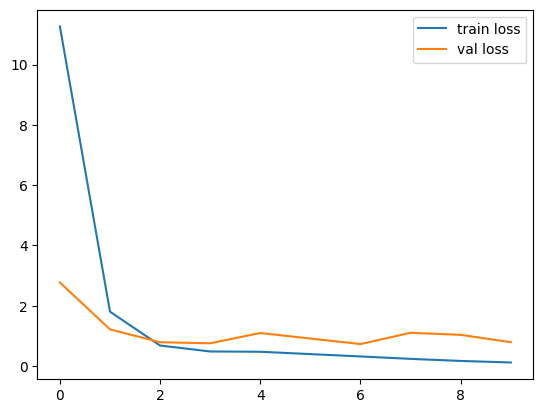

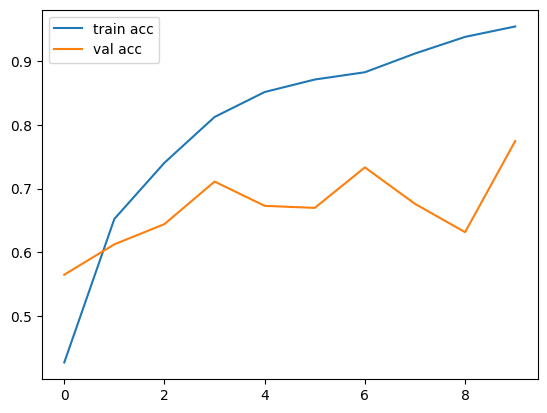

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(histry.history['loss'], label='train loss')
plt.plot(histry.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(histry.history['accuracy'], label='train acc')
plt.plot(histry.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
model.save('inception_chest.h5')

In [22]:
y_pred=model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

10/10 [==============================] - 3s 199ms/step


In [23]:
y_pred

array([2, 0, 1, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 1, 1, 0, 3, 1, 0, 2, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 1, 3, 3, 1, 0, 1, 2, 0, 2, 3, 0, 1, 3,
       0, 0, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 1, 0, 0, 3, 0, 3, 3, 3,
       3, 3, 1, 2, 2, 3, 0, 3, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 3, 2, 2, 0,
       3, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 3, 1, 0,
       0, 2, 3, 1, 2, 0, 0, 3, 2, 2, 0, 3, 3, 2, 0, 0, 3, 1, 3, 0, 3, 0,
       1, 0, 2, 0, 0, 2, 3, 2, 3, 2, 0, 0, 0, 1, 0, 2, 3, 0, 3, 3, 0, 2,
       3, 0, 1, 2, 0, 2, 3, 0, 3, 3, 0, 0, 1, 1, 0, 1, 0, 0, 2, 3, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 3, 2, 0, 0, 0, 2, 0, 0, 3, 3, 2, 0, 3, 3, 0,
       1, 3, 2, 1, 3, 3, 0, 3, 2, 1, 3, 3, 0, 0, 0, 3, 1, 2, 2, 0, 3, 3,
       3, 3, 3, 3, 0, 2, 3, 0, 0, 2, 3, 0, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3,
       2, 0, 0, 3, 2, 3, 0, 0, 3, 0, 3, 0, 3, 1, 3, 3, 2, 3, 1, 0, 2, 1,
       2, 3, 3, 3, 0, 1, 0, 1, 3, 3, 0, 0, 2, 3, 0, 0, 1, 1, 3, 1, 3, 0,
       0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0,

In [24]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]

In [25]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 2s 2s/step
AdenocarcinomaChest Lung Cancer 


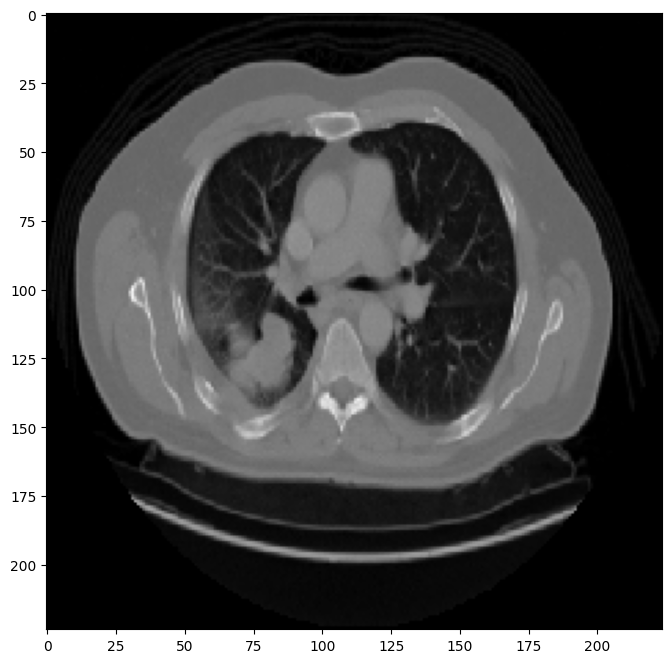

In [26]:
im=image.load_img('/kaggle/input/chest-ctscan-images/Data/test/adenocarcinoma/000113 (7).png',target_size=(224,224))
predict_image(im)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 28ms/step
AdenocarcinomaChest Lung Cancer 


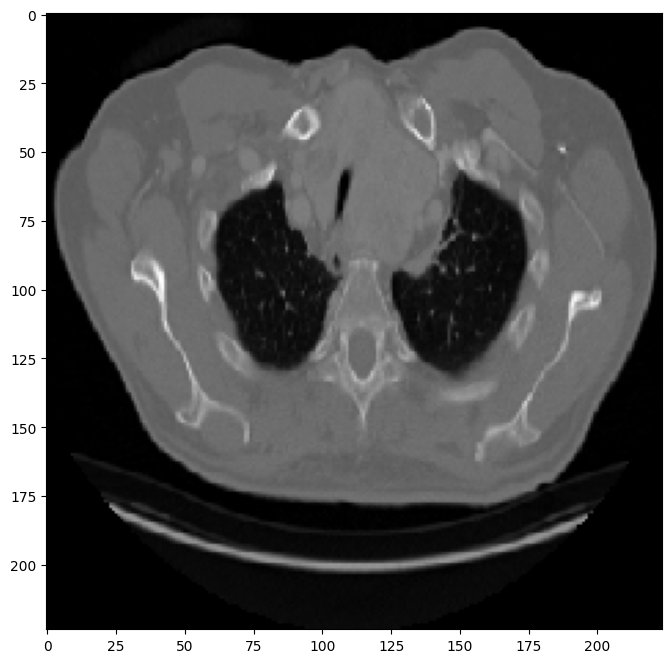

In [27]:
im=image.load_img('/kaggle/input/chest-ctscan-images/Data/test/large.cell.carcinoma/000108.png',target_size=(224,224))
predict_image(im)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 27ms/step
NO Lung Cancer/ NORMAL


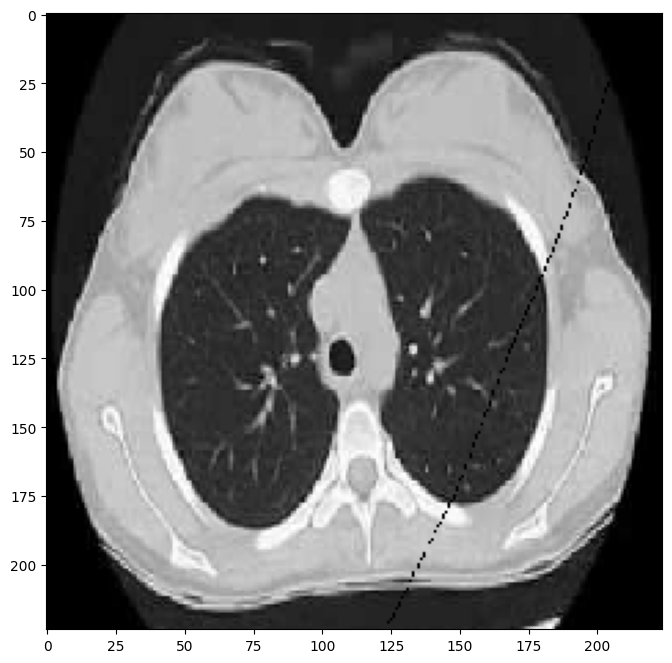

In [28]:
im=image.load_img('/kaggle/input/chest-ctscan-images/Data/test/normal/10 (2).png',target_size=(224,224))
predict_image(im)